In [1]:
import ROOT as r
import coffea
import coffea.hist as hist
from coffea.nanoevents.methods import vector
import uproot
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np

from pyjet import cluster
import awkward as ak

Welcome to JupyROOT 6.22/00


In [2]:
def getLZDF(f,nEvents=-1):
    events_raw = uproot.open(f)['MuonSystem']
    df = coffea.processor.LazyDataFrame(events_raw,entrystop=nEvents)
    start,stop = df._branchargs['entry_start'],df._branchargs['entry_stop']
    events = uproot.lazy(df._tree)
    events = events[start:stop]
    return events

In [3]:
events_1 = getLZDF("/uscms/home/kkwok/lpclonglived/HNL/HNL_electronType_mHNL10p0_pl100/HeavyNeutralLepton_Tree_0.root")
events_2 = getLZDF("/uscms/home/kkwok/lpclonglived/HNL/HNL_electronType_mHNL7p0_pl100/HeavyNeutralLepton_Tree_0.root")
t_m10_ct1000 = getLZDF("/uscms/home/kkwok/lpclonglived/HNL/HNL_electronType_mHNL7p0_pl100/HeavyNeutralLepton_Tree_0.root")

In [48]:
acc10 = ak.sum(ak.firsts(events_1.gLLP_csc))/len(events_1)
acc7 = ak.sum(ak.firsts(events_2.gLLP_csc))/len(events_2)

In [52]:
acc10

0.002580057671877371

In [23]:
hep.set_style(hep.style.CMS)

/cvmfs/sft.cern.ch/lcg/views/LCG_98python3/x86_64-centos7-gcc9-opt/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  """Entry point for launching an IPython kernel.


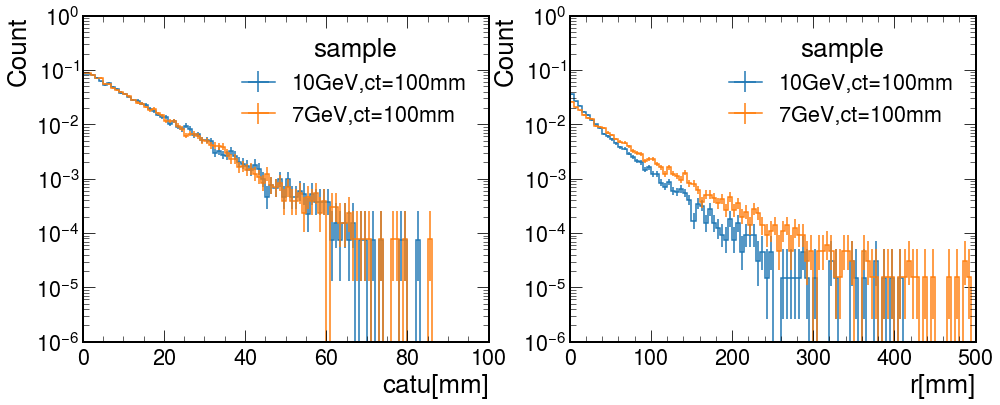

In [40]:
h = hist.Hist("Count",
             hist.Cat("sample","sample"),
             hist.Bin("ctau","catu[mm]",100,0,100))
h2 = hist.Hist("Count",
             hist.Cat("sample","sample"),
             hist.Bin("r","r[mm]",100,0,500))

fig, axs = plt.subplots(1,2,figsize=(16,6))

axs = axs.flatten()

h.fill(sample="10GeV,ct=100mm",ctau=np.array(ak.firsts(events_1.gLLP_ctau)))
h.fill(sample="7GeV,ct=100mm",ctau=np.array(ak.firsts(events_2.gLLP_ctau)))
h2.fill(sample="10GeV,ct=100mm",r=np.array(ak.firsts(events_1.gLLP_decay_vertex_r)))
h2.fill(sample="7GeV,ct=100mm",r=np.array(ak.firsts(events_2.gLLP_decay_vertex_r)))
hist.plot1d(h,ax = axs[0],density=True)
hist.plot1d(h2,ax = axs[1],density=True)
axs[0].set_ylim(1e-6,1)
axs[0].set_yscale("log")
axs[1].set_ylim(1e-6,1)
axs[1].set_yscale("log")

In [11]:
h.integrate("sample","10GeV,ct=100mm")

<Hist (ctau) instance at 0x7f7f526a6890>

In [13]:
import uproot3

In [29]:
fout = uproot3.recreate("ctau.root")
fout["m_10_ct100_ctau"] = hist.export1d(h.integrate("sample","10GeV,ct=100mm"))
fout["m_7_ct100_ctau"] = hist.export1d(h.integrate("sample","7GeV,ct=100mm"))